<a href="https://colab.research.google.com/github/thalesvalente/teaching/blob/main/artificial-intelligence/lessons/slides-13-redes-neurais-p3-pratica-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Introdu√ß√£o

Este notebook foi preparado para servir como um guia te√≥rico e pr√°tico sobre Redes Neurais Artificiais, abrangendo desde os principais conceitos at√© a implementa√ß√£o de exemplos b√°sicos em Python. Foi elaborado para alunos de Ci√™ncia da Computa√ß√£o, visando fornecer uma base s√≥lida e atual sobre o tema.

As Redes Neurais Artificiais (RNAs) s√£o inspiradas no funcionamento do c√©rebro humano, onde neur√¥nios artificiais s√£o conectados em camadas, processando informa√ß√µes e ajustando seus pesos (sinapses) para reconhecer padr√µes, classificar dados e realizar previs√µes.

# **2. Teoria das Redes Neurais**

## **2.1. Conceitos Fundamentais**

- **Neur√¥nio Artificial**: Unidade de processamento que recebe entradas (x·µ¢) com respectivos pesos (w·µ¢) e calcula um somat√≥rio. Em seguida, aplica-se uma fun√ß√£o de ativa√ß√£o para obter a sa√≠da do neur√¥nio.
- **Camadas da Rede**:
  - **Camada de Entrada**: Recebe o conjunto de caracter√≠sticas de cada amostra (por exemplo, pixels de imagem).
  - **Camadas Ocultas (Hidden Layers)**: Respons√°veis por mapear os dados de forma n√£o linear, aprendendo caracter√≠sticas mais complexas. √â nela que ocorre a maior parte do ‚Äútrabalho‚Äù da rede.
  - **Camada de Sa√≠da**: Fornece o resultado final do modelo, que pode ser uma probabilidade para cada classe (em classifica√ß√£o) ou um valor cont√≠nuo (em regress√£o).

## **2.2. Processamento Neural**

O processamento neural em uma rede √© dividido em duas etapas principais :contentReference[oaicite:2]{index=2}:

1. **Learning (Treinamento)**: A rede ajusta os pesos (sin√°pticos) de acordo com a fun√ß√£o de custo, minimizando o erro entre predi√ß√µes e valores reais.
2. **Recall (Infer√™ncia)**: A rede, j√° treinada, recebe novas entradas e produz uma sa√≠da, sem alterar os pesos.

## **2.3. Tipos de Arquitetura**

1. **Feedforward**: O fluxo de dados segue apenas de ‚Äúesquerda para direita‚Äù, ou seja, da camada de entrada at√© a sa√≠da, sem loops.
2. **Recorrentes (RNN)**: H√° realimenta√ß√£o dos neur√¥nios, permitindo que a sa√≠da de camadas anteriores influencie os passos seguintes.

## **2.4. Fun√ß√µes de Ativa√ß√£o**

A fun√ß√£o de ativa√ß√£o √© essencial para introduzir n√£o linearidade no modelo. Algumas das fun√ß√µes mais comuns:

- **ReLU (Rectified Linear Unit)**:
  $
    f(x) = 
      \begin{cases} 
         0 & x < 0 \\ 
         x & x \geq 0 
      \end{cases}
  $
  - Vantagens: Simples, computacionalmente eficiente, evita em boa parte o problema de _vanishing gradient_.
  - Desvantagem: Possibilidade de ‚Äúneur√¥nios mortos‚Äù caso \( x < 0 \) constante.

- **Sigmoid**:
  $
    f(x) = \frac{1}{1 + e^{-x}}
  $
  - Sa√≠da no intervalo (0,1), adequada para classifica√ß√£o bin√°ria.
  - Sofre mais com _vanishing gradient_ em redes profundas.

- **Tanh**:
  $
    f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
  $
  - Intervalo de sa√≠da (-1, 1). Similar √† sigmoid, por√©m centrada em zero.

- **Softmax**:
  $
    f(x_i) = \frac{e^{x_i}}{\sum_j e^{x_j}}
  $
  - Usada na camada de sa√≠da para problemas de classifica√ß√£o com m√∫ltiplas classes.
  - Retorna probabilidades que somam 1.


## **2.5. Fun√ß√µes de Custo**

A fun√ß√£o de custo mede o qu√£o distante o modelo est√° do objetivo.

- **Erro Quadr√°tico M√©dio (MSE)**
  $$
    MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
  $$
  - Utilizada em problemas de regress√£o (ativa√ß√£o linear na sa√≠da).

- **Entropia Cruzada Bin√°ria (Binary Cross-Entropy ‚Äì BCE)**:    
  $$
    J(\theta) = -\frac{1}{n} \sum_{i=1}^{n} \left[y_i \log(\hat{y}_i) + (1 - y_i)\log(1 - \hat{y}_i)\right]
  $$
  - Adequada para problemas de classifica√ß√£o bin√°ria (ativa√ß√£o sigmoid na sa√≠da).

- **Entropia Cruzada Categ√≥rica (CCE)**:    
  $$
    J(\theta) = -\frac{1}{n} \sum_{i=1}^{n} \sum_{c=1}^{C} y_{i,c} \log(\hat{y}_{i,c})
  $$
  - Ideal para classifica√ß√£o multiclasse (ativa√ß√£o softmax na sa√≠da).

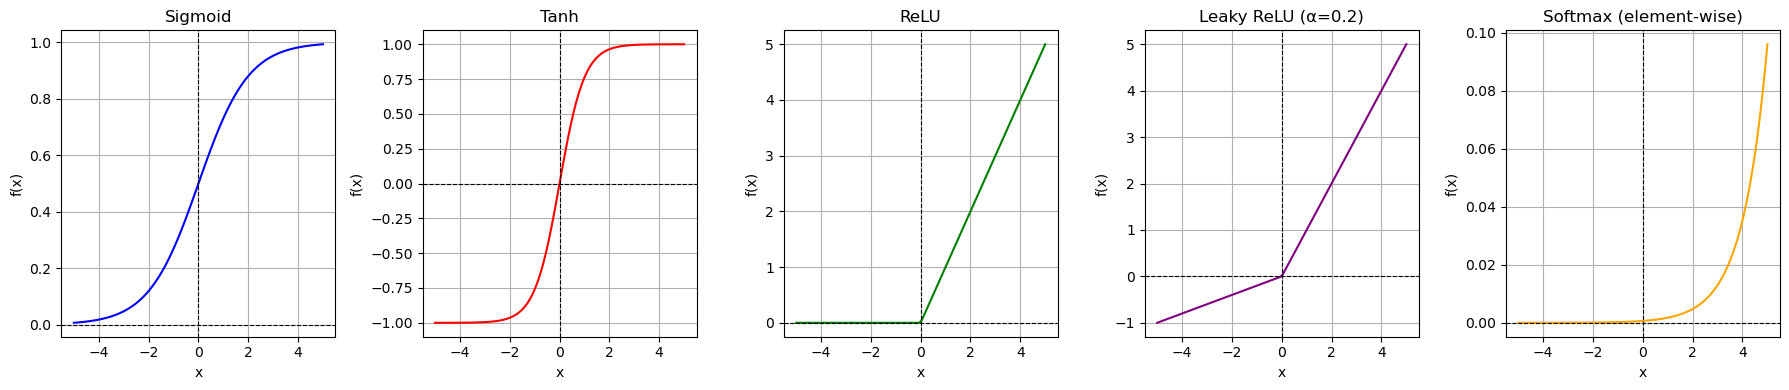

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Defini√ß√£o das fun√ß√µes de ativa√ß√£o
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def softmax(x):
    exp_x = np.exp(x - np.max(x))  # Evitar overflow num√©rico
    return exp_x / np.sum(exp_x)

# Gerar valores de entrada
x = np.linspace(-5, 5, 100)

# Calcular valores de sa√≠da
y_sigmoid = sigmoid(x)
y_tanh = tanh(x)
y_relu = relu(x)
y_leaky_relu = leaky_relu(x, alpha=0.2)  # Aumentando o alpha para tornar mais evidente a inclina√ß√£o
y_softmax = softmax(x)  # Softmax aplicado a cada ponto separadamente

# Criar gr√°ficos lado a lado
fig, axes = plt.subplots(1, 5, figsize=(18, 4))

# Fun√ß√£o auxiliar para desenhar eixos X=0 e Y=0
def plot_with_axes(ax, x, y, title, color):
    ax.plot(x, y, label=title, color=color)
    ax.axhline(y=0, color='black', linestyle='--', linewidth=0.8)  # Linha horizontal em y=0
    ax.axvline(x=0, color='black', linestyle='--', linewidth=0.8)  # Linha vertical em x=0
    ax.set_title(title)
    ax.set_xlabel("x")
    ax.set_ylabel("f(x)")
    ax.grid()

# Plotando cada fun√ß√£o com eixos adicionais
plot_with_axes(axes[0], x, y_sigmoid, "Sigmoid", "blue")
plot_with_axes(axes[1], x, y_tanh, "Tanh", "red")
plot_with_axes(axes[2], x, y_relu, "ReLU", "green")
plot_with_axes(axes[3], x, y_leaky_relu, "Leaky ReLU (Œ±=0.2)", "purple")
plot_with_axes(axes[4], x, y_softmax, "Softmax (element-wise)", "orange")

# Ajuste de layout
plt.tight_layout()
plt.show()


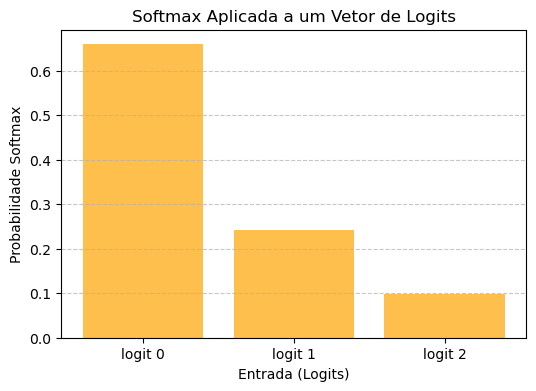

In [5]:
# Exemplo da Softmax aplicada a um vetor de logits

# Criando um conjunto de logits (exemplo de sa√≠das de uma camada densa)
logits = np.array([2.0,1.0,0.1])

# Aplicando a Softmax corretamente ao vetor de logits
softmax_outputs = softmax(logits)

# Plotando a distribui√ß√£o Softmax
plt.figure(figsize=(6, 4))
plt.bar(range(len(logits)), softmax_outputs, color="orange", alpha=0.7)
plt.xticks(range(len(logits)), labels=[f"logit {i}" for i in range(len(logits))])
plt.xlabel("Entrada (Logits)")
plt.ylabel("Probabilidade Softmax")
plt.title("Softmax Aplicada a um Vetor de Logits")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibir o gr√°fico
plt.show()

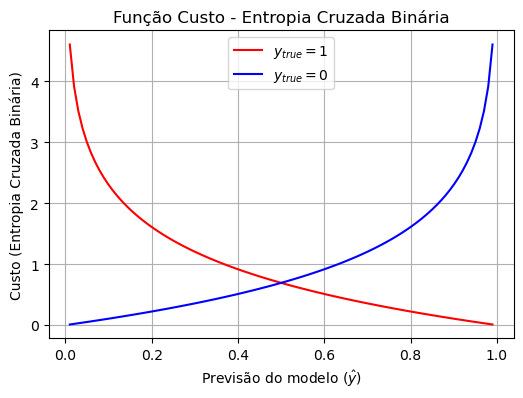

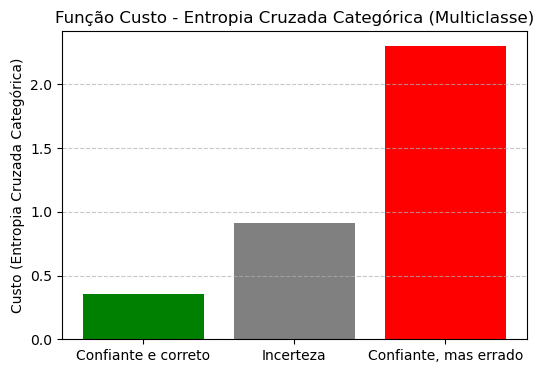

In [6]:
# Reimportando bibliotecas ap√≥s reset do ambiente
import numpy as np
import matplotlib.pyplot as plt

# Fun√ß√£o de entropia cruzada bin√°ria
def binary_cross_entropy(y_true, y_pred):
    return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Valores de previs√£o (y_pred) variando entre 0.01 e 0.99 para evitar log(0)
y_pred = np.linspace(0.01, 0.99, 100)

# Calculando BCE para os dois casos poss√≠veis de y_true
bce_y1 = binary_cross_entropy(1, y_pred)  # Quando y_true = 1
bce_y0 = binary_cross_entropy(0, y_pred)  # Quando y_true = 0

# Criando o gr√°fico para Entropia Cruzada Bin√°ria
plt.figure(figsize=(6, 4))
plt.plot(y_pred, bce_y1, label=r"$y_{true} = 1$", color="red")
plt.plot(y_pred, bce_y0, label=r"$y_{true} = 0$", color="blue")
plt.xlabel("Previs√£o do modelo ($\hat{y}$)")
plt.ylabel("Custo (Entropia Cruzada Bin√°ria)")
plt.title("Fun√ß√£o Custo - Entropia Cruzada Bin√°ria")
plt.legend()
plt.grid()
plt.show()

# --- ENTROPIA CRUZADA CATEG√ìRICA (MULTICLASSE) ---

# Fun√ß√£o de entropia cruzada categ√≥rica
def categorical_cross_entropy(y_true, y_pred):
    return -np.sum(y_true * np.log(y_pred), axis=1)

# Criando predi√ß√µes para um problema com 3 classes (exemplo: classifica√ß√£o multiclasse)
y_pred_multi = np.array([
    [0.7, 0.2, 0.1],  # Modelo confiante e correto (classe 1)
    [0.4, 0.3, 0.3],  # Modelo incerto
    [0.1, 0.1, 0.8],  # Modelo confiante, mas errado (classe 1 correta seria 0.1)
])

# Defini√ß√£o das classes reais (one-hot encoding)
y_true_multi = np.array([
    [1, 0, 0],  # Classe 1 correta
    [1, 0, 0],  # Classe 1 correta
    [1, 0, 0],  # Classe 1 correta
])

# Calculando a entropia cruzada categ√≥rica
cce_values = categorical_cross_entropy(y_true_multi, y_pred_multi)

# Criando o gr√°fico para Entropia Cruzada Categ√≥rica
plt.figure(figsize=(6, 4))
plt.bar(["Confiante e correto", "Incerteza", "Confiante, mas errado"], cce_values, color=["green", "gray", "red"])
plt.ylabel("Custo (Entropia Cruzada Categ√≥rica)")
plt.title("Fun√ß√£o Custo - Entropia Cruzada Categ√≥rica (Multiclasse)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [7]:
# Definindo os valores reais e previstos
y_true = 1  # Classe correta
y_pred = 0.9  # Previs√£o do modelo

# Calculando Erro Quadr√°tico M√©dio (MSE)
mse_cost = (y_true - y_pred) ** 2

# Calculando Entropia Cruzada Bin√°ria (BCE)
bce_cost = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

mse_cost, bce_cost

(0.009999999999999995, 0.10536051565782628)

# **3. Exemplos Pr√°ticos em Python**

## 3.1 Problema do AND

1. **Rede Neural implementada sem bibliotecas (do zero)** usando apenas Python e NumPy para manipular arrays.
2. **Rede Neural usando PyTorch** (usando `nn.Module`).
3. **Rede Neural usando Tensorflow**(usando `tf.keras`).

A tabela verdade do AND √©:

| x1 | x2 | y (x1 AND x2) |
|----|----|---------------|
|  0 |  0 |      0        |
|  0 |  1 |      0        |
|  1 |  0 |      0        |
|  1 |  1 |      1        |  
  
--
> **Observa√ß√£o**: O problema do AND √© linearmente separ√°vel, portanto um √∫nico neur√¥nio (camada √∫nica) com fun√ß√£o de ativa√ß√£o degrau pode aprend√™-lo.  Neste exemplo, resolveremos o problema l√≥gico **AND** utilizando **exatamente o mesmo procedimento em todas as vers√µes**:  
- **Fun√ß√£o de Ativa√ß√£o**: degrau (_step function_).  
- **Regra de Atualiza√ß√£o**: Regra do Perceptron cl√°ssico (n√£o usa gradiente ou entropia cruzada).  
- **Loop de Treinamento** manual, iterando sobre cada amostra e ajustando pesos quando h√° erro.

Al√©m disso, **geraremos uma anima√ß√£o** mostrando, passo a passo, como a **reta de separa√ß√£o** se ajusta ap√≥s cada atualiza√ß√£o de peso, na vers√£o ‚Äúsem bibliotecas‚Äù (pura NumPy). Nas vers√µes PyTorch e TensorFlow, mostraremos apenas o loop de treinamento, mas o procedimento √© igual.

### 3.1.1 Conceitos te√≥ricos

Um **Perceptron de 2 entradas** define sua fronteira de decis√£o por meio da equa√ß√£o:

$$
w_1 \cdot x_1 \;+\; w_2 \cdot x_2 \;+\; b = 0
$$

- Aqui, $ (x_1, x_2) $ representa um ponto no plano 2D.
- $ (w_1, w_2) $ s√£o os **pesos sin√°pticos** do perceptron.
- $ b $ √© o **bias** (deslocamento da fronteira de decis√£o).

Agora, vamos **transformar a equa√ß√£o de uma reta** comum no **formato do perceptron** e, em seguida, **isolar $ x_2 $** para entender como visualizar a reta no gr√°fico.
Na **regress√£o linear** simples, a equa√ß√£o de uma reta √© escrita como:

$$
y = a \, x + b,
$$

onde:
- $ x $ √© a **vari√°vel independente** (eixo horizontal),
- $ y $ √© a **vari√°vel dependente** (eixo vertical),
- $ a $ (ou slope) √© o **coeficiente angular** (inclina√ß√£o da reta),
- $ b $ √© o **coeficiente linear** (ponto onde a reta cruza o eixo $y$).

A quest√£o que surge √©:
- Como transformar essa equa√ß√£o na forma usada pelo **Perceptron**?
---  

o **Perceptron** separa duas regi√µes do plano por meio da equa√ß√£o:

$$
w_1 \cdot x_1 + w_2 \cdot x_2 + b_{\text{perc}} = 0.
$$

Se quisermos que essa equa√ß√£o seja "traduzida" **na equa√ß√£o** $ y = ax + b $, podemos fazer:
1. Associamos **as vari√°veis**:
   - $ x_1 \equiv x $  
   - $ x_2 \equiv y $  

2. Substitu√≠mos $ y $ pela equa√ß√£o da reta:

$$
y = ax + b   
$$
$$
x_2 = ax_1 + b  
$$
$$
x_2 - a x_1 - b = 0
$$

Ou seja:

$$
a \, x_1 - x_2 + b  = 0
$$


3. Comparando com a forma do perceptron $ w_1 x_1 + w_2 x_2 + b_{\text{perc}} = 0 $, temos:

$$
\underbrace{a}_{w_1} \cdot x_1
\;+\;
\underbrace{(-1)}_{w_2} \cdot x_2
\;+\;
\underbrace{b}_{b_{\text{perc}}}
= 0.
$$

Portanto, **os par√¢metros do Perceptron s√£o**:
- $ w_1 = a $ (inclina√ß√£o da reta).
- $ w_2 = -1 $ (peso negativo para $ x_2 $).
- $ b_{\text{perc}} = b $ (o mesmo bias da regress√£o).

4. Se quisermos fazer a volta, fazemos:

$$
a x_1 - x_2 + b = 0 \Longrightarrow -x_2 = -a x_1 - b
$$

Multiplicamos ambos os lados por -1:

$$
\underbrace{x_2}_{y} = a \underbrace{x_1}_{x} + b \Longrightarrow y = ax + b
$$
Pois,
- $ x_1 \equiv x $  
- $ x_2 \equiv y $  

Resolvendo para $ x_2 $, passando o $(-1)$, que √© $w_2$ para o outro lado dividindo e isolando o sinal da parte de cima temos:

$$
x_2 = -\frac{(b + a x_1)}{-1} \Longrightarrow  b + a x_1 
$$

$$
x_2 = a x_1 + b
$$

$$
y = a x + b
$$

Isso confirma que a equa√ß√£o original **√© exatamente a mesma** no formato perceptron. Assim, para plotar a reta em termos de $w_1$, $w_2$, $x_1$,$x_2$, fazemos:
$$
x_2 = -\frac{(b + w_1 x_1)}{w_2} 
$$


4. Isolando $ x_2 $
Agora, queremos expressar $ x_2 $ explicitamente para podermos visualizar a reta no $ùë•_1$ x $x_2$. Partimos da equa√ß√£o do perceptron:

$$
w_1 x_1 + w_2 x_2 + b_{\text{perc}} = 0.
$$


o **Forma geral: isolando $ùë•_2$ para qualquer $w_1$, $w_2$, $b_{perc}$**

Voltando √† forma mais geral da equa√ß√£o do perceptron:

$$
w_1 \cdot x_1 + w_2 \cdot x_2 + b_{\text{perc}} = 0.
$$

podemos isolar $x_2$ sem impor $w_2 = -1$


Equa√ß√£o original (regress√£o): y = a*x + b
   => y = 1.5 * x + (-0.2)

Equa√ß√£o no formato perceptron: w1*x1 + w2*x2 + b_perc = 0
   => 1.5 * x1 + -1 * x2 + (-0.2) = 0



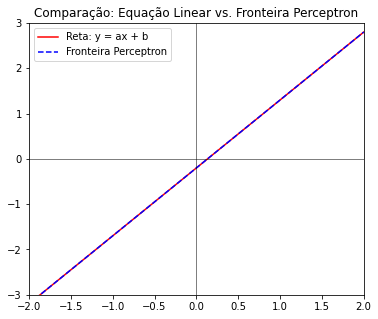

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Defini√ß√£o da reta na forma y = ax + b
a = 1.5     # Inclina√ß√£o (slope)
b = -0.2   # Intercepto

print("Equa√ß√£o original (regress√£o): y = a*x + b")
print(f"   => y = {a} * x + ({b})\n")

# 2) Geramos valores de x
x_vals = np.linspace(-2, 2, 50)  # Intervalo de x de -2 a 2
y_vals = a*x_vals + b            # C√°lculo da reta na forma cl√°ssica

# 3) Convertendo para formato perceptron
w1 = a
w2 = -1 
b_perc = b

print("Equa√ß√£o no formato perceptron: w1*x1 + w2*x2 + b_perc = 0")
print(f"   => {w1} * x1 + {w2} * x2 + ({b_perc}) = 0\n")

# 4) Isolando x2 na equa√ß√£o do Perceptron
x2_vals = -(b_perc + w1*x_vals)/w2  # Isso nos d√° a mesma reta

# 5) Plotando
plt.figure(figsize=(6,5))
plt.plot(x_vals, y_vals, 'r-', label="Reta: y = ax + b")
plt.plot(x_vals, x2_vals, 'b--', label="Fronteira Perceptron")

plt.axhline(0, color='black', linewidth=0.5)  # eixo X
plt.axvline(0, color='black', linewidth=0.5)  # eixo Y

plt.xlim(-2, 2)
plt.ylim(-3, 3)

plt.title("Compara√ß√£o: Equa√ß√£o Linear vs. Fronteira Perceptron")
plt.legend()
plt.show()

Portanto, podemos concluir que, a partir da equa√ß√£o:

$$
w_1 \cdot x_1 + w_2 \cdot x_2 + b_{\text{perc}} = 0.
$$

onde:

- $x_1$, $x_2$ s√£o as entradas (representando o plano 2D);
- $w_1$, $w_2$ s√£o os pesos sin√°pticos;
- $b_{perc}$ √© o bias (deslocamento da reta).

‚úèÔ∏è podemos expressar $x_2$ em fun√ß√£o de $x_1$, fazendo apenas $w_2 \cdot x_2$ ficando do lado esquerdo da equa√ß√£o:

$$
w_2 \cdot x_2 = - w_1 \cdot x_1 - b_{\text{perc}}
$$

‚úèÔ∏è O pr√≥ximo passo √© dividir ambos os lados por $w_2$:

$$
\frac{w_2 \cdot x_2}{w_2} = \frac{- w_1 \cdot x_1}{w_2} - \frac{b_{\text{perc}}}{w_2}
$$

$$
x_2 = - \frac{w_1}{w_2} \cdot x_1 - \frac{b_\text{perc}}{w_2}
$$

üß† Interpreta√ß√£o: comparando com a forma geral da equa√ß√£o de uma reta $ùë¶=ax+b$, podemos identificar:
- **Coeficiente angular**: 
1. **Inclina√ß√£o - $w_2$ controla a inclina√ß√£o da reta**
   - A inclina√ß√£o √© dada por:
     $$
     -\dfrac{w_1}{\,w_2\,} = a
     $$
      - Se $\lvert w_2 \rvert$ √© grande (mantendo $w_1$ fixo), o valor da inclina√ß√£o se aproxima de zero (a reta fica mais horizontal).
      - Se $\lvert w_2 \rvert$ √© pequena (mantendo $w_1$ fixo), a inclina√ß√£o aumenta em m√≥dulo (reta mais inclinada ou vertical).

   Ou seja, $w_2$ regula o qu√£o inclinada a reta ser√°.

2. **Dire√ß√£o - $w_2$ controla a dire√ß√£o (subindo ou descendo)**
   - Vejamos o sinal de $w_2$:
      - Se $w_2 > 0$, ent√£o $-\frac{w_1}{w_2}$ ser√° negativo ‚Üí a reta fica inclinada para baixo ‚Üò.
      - Se $w_2 < 0$, ent√£o $-\frac{w_1}{w_2}$ ser√° positivo ‚Üí a reta fica inclinada para cima ‚Üó.

   Portanto:
   - Se $w_2$ √© positivo, a reta desce ‚Üò.
   - Se $w_2$ √© negativo, a reta sobe ‚Üó.

- **Intercepto**:
   - **$w_2$ afeta o deslocamento no eixo $x_2$**. O intercepto da reta no eixo $x_2$ (isto √©, onde a reta cruza o eixo $x_2$ e $x_1 = 0$) √© dado por:
     $$
     \text{intercepto em }x_2 
     \;=\;
     -\dfrac{b}{\,w_2\,}.
     $$
   Isso significa que:
      - Se $\lvert w_2 \rvert$ √© grande, $-\frac{b}{w_2}$ ser√° pequeno e esse intercepto se aproxima de 0 (mais pr√≥ximo do eixo $x_1$).
      - Se $\lvert w_2 \rvert$ √© pequeno, $-\frac{b}{w_2}$ cresce em m√≥dulo (ser√° grande) e a reta se afasta do eixo $x_1$.

$$
\boxed{
\text{Em resumo, } w_2 \text{ determina a inclina√ß√£o, o sentido e o deslocamento vertical da reta.}
}
$$ 

Uma √∫ltima forma de escrever, resumida seria:

$$
x_2 = - (\frac{b_\text{perc} + w_1 \cdot x_1}{w_2}) 
$$

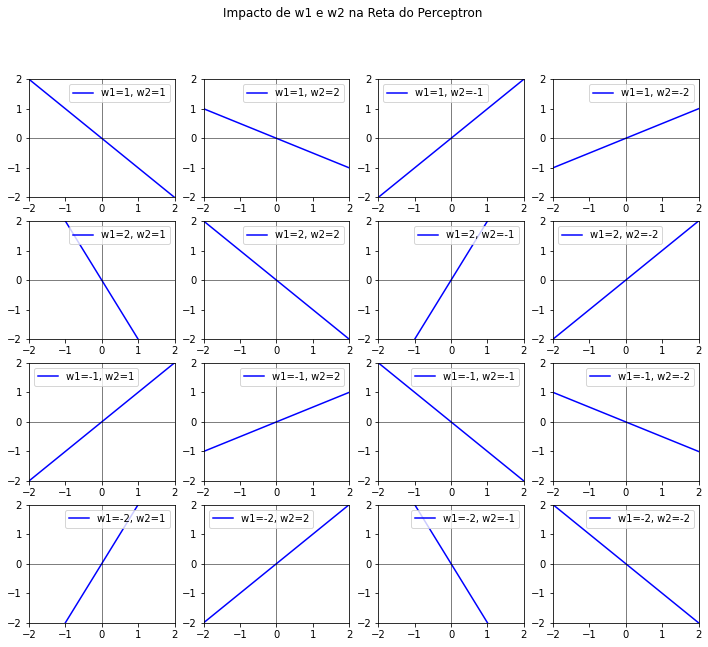

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Defini√ß√£o dos pesos e bias
w1_values = [1, 2, -1, -2]  # Diferentes valores de w1 para testar
w2_values = [1, 2, -1, -2]  # Diferentes valores de w2 para testar
b = 0  # Bias fixo para facilitar a an√°lise

# Defini√ß√£o do intervalo de x1
x1_vals = np.linspace(-2, 2, 50)

# Criar subplots para visualizar diferentes configura√ß√µes de w1 e w2
fig, axes = plt.subplots(len(w1_values), len(w2_values), figsize=(12, 10))

for i, w1 in enumerate(w1_values):
    for j, w2 in enumerate(w2_values):
        ax = axes[i, j]
        if abs(w2) > 1e-9:  # Evitar divis√£o por zero
            x2_vals = -(b + w1 * x1_vals) / w2
            ax.plot(x1_vals, x2_vals, 'b-', label=f"w1={w1}, w2={w2}")
            ax.axhline(0, color='black', linewidth=0.5)  # Eixo X
            ax.axvline(0, color='black', linewidth=0.5)  # Eixo Y
            ax.set_xlim(-2, 2)
            ax.set_ylim(-2, 2)
            ax.legend()

plt.suptitle("Impacto de w1 e w2 na Reta do Perceptron")
plt.show()

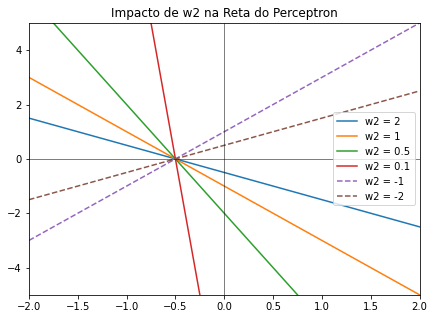

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Fixamos um valor para w1 e b
w1 = 2
b = 1

# Testamos diferentes valores de w2
w2_values = [2, 1, 0.5, 0.1, -1, -2]

# Criamos um conjunto de x1 (horizontal)
x1_vals = np.linspace(-2, 2, 50)

plt.figure(figsize=(7,5))
for w2 in w2_values:
    # Calculamos x2 para cada w2
    x2_vals = -(b + w1*x1_vals)/w2
    
    # Definimos um estilo de linha baseado no sinal de w2
    linestyle = '-' if w2 > 0 else '--'
    plt.plot(x1_vals, x2_vals, linestyle, label=f"w2 = {w2}")

# Adicionamos eixos e legenda
plt.axhline(0, color='black', linewidth=0.5)  # eixo X
plt.axvline(0, color='black', linewidth=0.5)  # eixo Y
plt.xlim(-2, 2)
plt.ylim(-5, 5)
plt.legend()
plt.title("Impacto de w2 na Reta do Perceptron")
plt.show()


### 3.1.1 Problema do AND - Rede Neural implementada do zero usando `NumPy`

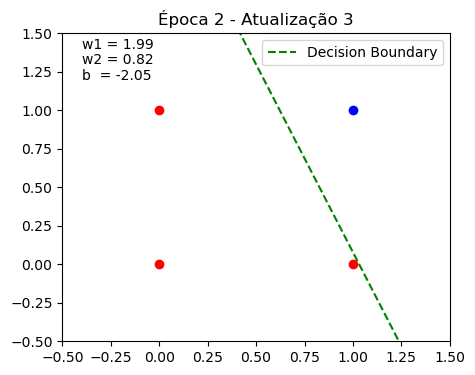

√âpoca 2, Erros: 1
√âpoca 3, Erros: 0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

# -------------------------------------------------------
# 1) DADOS DE TREINAMENTO: PORTA AND
# -------------------------------------------------------
# X: entradas; y: sa√≠da esperada
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype=float)

y = np.array([0, 0, 0, 1], dtype=float)

# -------------------------------------------------------
# 2) HIPERPAR√ÇMETROS E INICIALIZA√á√ÉO DE PESOS
# -------------------------------------------------------
lr = 0.1          # Taxa de aprendizado (eta). Valor que controla o passo de ajuste.
max_epochs = 10   # N√∫mero m√°ximo de √©pocas de treinamento (iteradas completas nos dados).

# Pesos e bias (inicializados aleatoriamente).
# Aqui, W[0] = w1 e W[1] = w2, e b √© o bias.
W = np.random.randn(2)   # w1, w2
b = np.random.randn()    # bias
# -------------------------------------------------------
# Ex.: se W = [1.5, -0.8], ent√£o w1 = 1.5, w2 = -0.8
#      se b = 0.3, ent√£o bias = 0.3
# -------------------------------------------------------

# -------------------------------------------------------
# 3) FUN√á√ÉO DE ATIVA√á√ÉO TIPO DEGRAU
# -------------------------------------------------------
def step_function(z):
    """
    Retorna 1 se z >= 0, caso contr√°rio 0.
    """
    return 1 if z >= 0 else 0

# -------------------------------------------------------
# 4) FUN√á√ÉO PARA PLOTAR A FRONTEIRA DE DECIS√ÉO
# -------------------------------------------------------
def plot_decision_boundary(W, b, X, y, epoch, update_i):
    """
    Plota os pontos (X, y) e a reta dada por:
      w1*x1 + w2*x2 + b = 0  =>  x2 = -(b + w1*x1)/w2
    Par√¢metros:
      - W, b: pesos atuais do Perceptron e o bias.
      - X, y: dados de entrada e suas respectivas classes.
      - epoch: √©poca atual (para exibir no t√≠tulo).
      - update_i: √≠ndice de atualiza√ß√£o dentro da √©poca atual.
    """
    plt.figure(figsize=(5,4))
    
    # 4.1) Plotando pontos (vermelho = classe 0, azul = classe 1)
    for i, (x_pt, label) in enumerate(zip(X, y)):
        if label == 0:
            plt.plot(x_pt[0], x_pt[1], 'ro')
        else:
            plt.plot(x_pt[0], x_pt[1], 'bo')
    
    # 4.2) Gerar reta (Decision Boundary) se w2 != 0
    x_vals = np.linspace(-0.5, 1.5, 50)
    if abs(W[1]) > 1e-9:
        y_vals = -(b + W[0]*x_vals) / W[1]
        plt.plot(x_vals, y_vals, 'g--', label="Decision Boundary")
    
    # 4.3) Ajustes de exibi√ß√£o
    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)
    
    # 4.4) Anota na figura os valores atuais de w1, w2, b
    w1_txt = f"w1 = {W[0]:.2f}"
    w2_txt = f"w2 = {W[1]:.2f}"
    b_txt  = f"b  = {b:.2f}"
    plt.text(0.05, 0.95, w1_txt, transform=plt.gca().transAxes, fontsize=10, color='black')
    plt.text(0.05, 0.90, w2_txt, transform=plt.gca().transAxes, fontsize=10, color='black')
    plt.text(0.05, 0.85, b_txt,  transform=plt.gca().transAxes, fontsize=10, color='black')
    
    plt.title(f"√âpoca {epoch} - Atualiza√ß√£o {update_i}")
    plt.legend()
    plt.show()


# -------------------------------------------------------
# 5) TREINAMENTO + ANIMA√á√ÉO
# -------------------------------------------------------
# O "epoch" (√©poca) conta quantas vezes passamos por todo o conjunto de dados.
# "update_i" conta qual atualiza√ß√£o dentro da √©poca estamos fazendo.
# "error_count" √© quantos erros (e, portanto, atualiza√ß√µes) ocorreram na √©poca.
# Se error_count = 0 ao final de uma √©poca, significa que o Perceptron classificou
# todos os pontos corretamente e podemos encerrar.
# -------------------------------------------------------
epoch = 0
for epoch in range(1, max_epochs+1):
    error_count = 0  # contador de erros nessa √©poca
    # len(X) √© 4, pois h√° 4 amostras. Dentro desse loop, voc√™ acessa cada amostra X[i], isto √©:
    # i=0 -> X[0] = [0, 0], y[0] = 0
    # i=1 -> X[1] = [0, 1], y[1] = 0
    # i=2 -> X[2] = [1, 0], y[2] = 0
    # i=3 -> X[3] = [1, 1], y[3] = 1
    for i in range(len(X)):
        # 5.1) Forward: c√°lculo z = (w1*x1 + w2*x2 + b)
        # calcula z = np.dot([x1, x2], [w1, w2]) + b ou z = sum(x[i][j] * W[j]) + b
        z = np.dot(X[i], W) + b
        
        # 5.2) y_pred = step_function(z)
        y_pred = step_function(z)
        
        # 5.3) Erro e = (y_verdadeiro - y_predito)
        e = y[i] - y_pred
        
        # 5.4) Ajuste de pesos (Regra do Perceptron) se e != 0
        if e != 0:
            # w[j] = w[j] + n * (y[i] - y_pred) * x[i][j]
            W += lr * e * X[i]
            # b = b + n * (y[i] - y_pred)
            b += lr * e
            error_count += 1
            
            # Gerar anima√ß√£o (limpa o plot anterior, gera o plot novo)
            clear_output(wait=True)
            plot_decision_boundary(W, b, X, y, epoch, update_i=i+1)
            time.sleep(0.5)
    
    print(f"√âpoca {epoch}, Erros: {error_count}")
    # Se zero erros nesta √©poca, significa converg√™ncia
    if error_count == 0:
        break


## 1. Superf√≠cie de erro com **bias fixo** (`b = 0`)



O objetivo deste bloco √© **mostrar o que acontece quando plotamos a superf√≠cie de erro
do Perceptron fixando o bias em zero** e usando **diretamente** a f√≥rmula cl√°ssica  
$z = w_1x_1 + w_2x_2 + b$.

> **Por que isso √© ‚Äúerrado‚Äù?**  
> * Para a porta **AND**, o bias √© indispens√°vel: √© ele que ‚Äúempurra‚Äù a
>   fronteira de decis√£o para separar corretamente o ponto (1, 1) dos
>   demais.  
> * Fixar `b = 0` prende a reta ao passar pela origem, tornando imposs√≠vel
>   atingir erro zero ‚Äî o que se refletir√° numa superf√≠cie
>   **achatada** e **n√£o informativa** para grande parte dos pares
>   $(w_1, w_2)$.

Depois de executar, observe que:
1. A menor regi√£o de erro **n√£o** atinge zero.
2. O caminho de descida do gradiente fica confinado a essa superf√≠cie
   ‚Äúruim‚Äù.  
Na pr√≥xima etapa mostraremos como **liberar o bias** (ou transformar a
equa√ß√£o na forma $x_2 = -(\frac{w_1}{w_2}x_1 - \frac{b}{w_2})$ para obter
uma superf√≠cie de erro representativa.

---

### C√≥digo‚Äêexemplo: erro da porta AND com `b = 0`


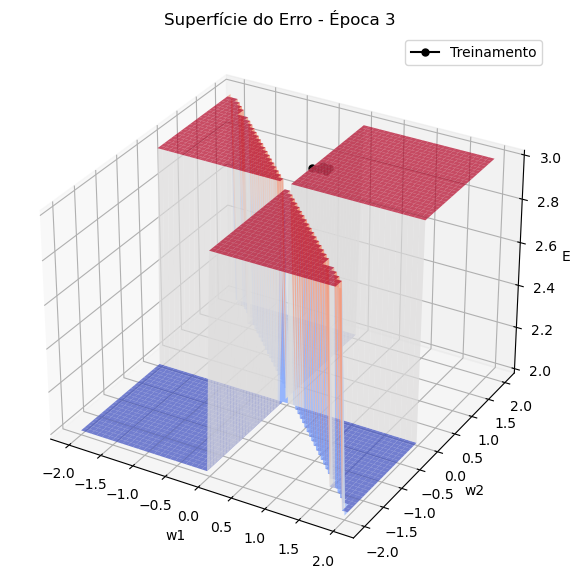

√âpoca 3, Erros: 1
√âpoca 4, Erros: 0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output
import time

# -------------------------------------------------------
# 1) DADOS DE TREINAMENTO: PORTA AND
# -------------------------------------------------------
# X: entradas; y: sa√≠da esperada
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype=float)

y = np.array([0, 0, 0, 1], dtype=float)

# -------------------------------------------------------
# 2) HIPERPAR√ÇMETROS E INICIALIZA√á√ÉO DE PESOS
# -------------------------------------------------------
lr = 0.1          # Taxa de aprendizado (eta). Valor que controla o passo de ajuste.
max_epochs = 10   # N√∫mero m√°ximo de √©pocas de treinamento (iteradas completas nos dados).

# Pesos e bias (inicializados aleatoriamente).
# Aqui, W[0] = w1 e W[1] = w2, e b √© o bias.
W = np.random.randn(2)   # w1, w2
b = np.random.randn()    # bias

# -------------------------------------------------------
# 3) FUN√á√ÉO DE ATIVA√á√ÉO TIPO DEGRAU
# -------------------------------------------------------
# f(x) = { 1, se x >= 0
#          0, se x < 0
#        }
def step_function(z):
    return 1 if z >= 0 else 0 

# -------------------------------------------------------
# 4) FUN√á√ÉO DE ERRO DO PERCEPTRON
# -------------------------------------------------------
def perceptron_error(W1, W2, b, X, y):
    errors = 0
    for i in range(len(X)):
        z = W1 * X[i, 0] + W2 * X[i, 1] + b # formula do Perceptron -> z = w1*x1 + w2*x2 + b
        y_pred = step_function(z)
        if y_pred != y[i]: # se a previs√£o n√£o for igual ao valor esperado
            # conta como erro
            errors += 1
    return errors

# -------------------------------------------------------
# 5) TREINAMENTO + ANIMA√á√ÉO COM SUPERF√çCIE DE ERRO
# -------------------------------------------------------
w1_range = np.linspace(-2, 2, 50)
w2_range = np.linspace(-2, 2, 50)
error_surface = np.zeros((len(w1_range), len(w2_range)))

# Preencher a superf√≠cie de erro
b_fixed = 0
for i, w1 in enumerate(w1_range):
    for j, w2 in enumerate(w2_range):
        error_surface[i, j] = perceptron_error(w1, w2, b_fixed, X, y)

W_path = []  # Para armazenar o caminho dos pesos ao longo do treinamento

epoch = 0
for epoch in range(1, max_epochs+1):
    error_count = 0
    for i in range(len(X)):
        z = np.dot(X[i], W) + b # C√°lculo de z = w1*x1 + w2*x2 + b (outra forma de escrever)
        y_pred = step_function(z)
        e = y[i] - y_pred       # Erro: diferen√ßa entre o valor esperado e o previsto

        if e != 0:
            W += lr * e * X[i] # Atualiza os pesos usando a formula W = W + n * e * x[i]
            b += lr * e # Atualiza o bias usando a formula b = b + n * e
            error_count += 1 
            W_path.append((W[0], W[1]))

            # Atualiza a visualiza√ß√£o
            clear_output(wait=True)
            fig = plt.figure(figsize=(10, 7))
            ax = fig.add_subplot(111, projection='3d')
            W1_grid, W2_grid = np.meshgrid(w1_range, w2_range)
            ax.plot_surface(W1_grid, W2_grid, error_surface.T, cmap='coolwarm', alpha=0.7)
            
            # Plota o caminho percorrido pelos pesos
            if len(W_path) > 1:
                W1_vals, W2_vals = zip(*W_path)
                errors_vals = [perceptron_error(w1, w2, b_fixed, X, y) for w1, w2 in W_path]
                ax.plot(W1_vals, W2_vals, errors_vals, marker='o', color='black', markersize=5, label="Treinamento")
            
            ax.set_xlabel("w1")
            ax.set_ylabel("w2")
            ax.set_zlabel("Erro")
            ax.set_title(f"Superf√≠cie do Erro - √âpoca {epoch}")
            plt.legend()
            plt.show()
            time.sleep(0.5)
    
    print(f"√âpoca {epoch}, Erros: {error_count}")
    if error_count == 0:
        break


Plotando o processo lado-a-lado

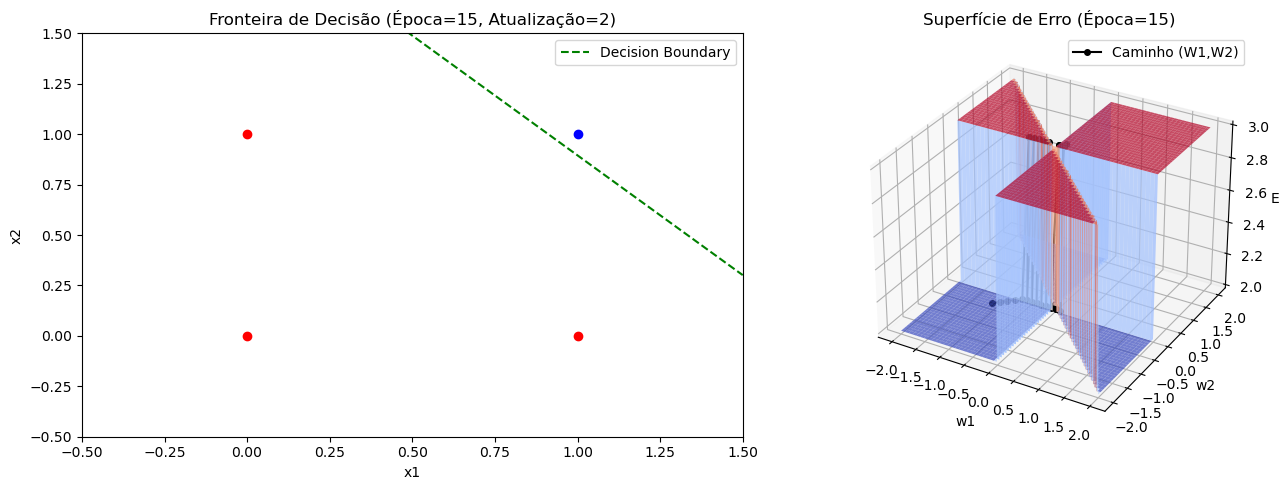

√âpoca 15, Erros: 1
√âpoca 16, Erros: 0


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output
import time

# -------------------------------------------------------
# 1) DADOS DE TREINAMENTO: PORTA AND
# -------------------------------------------------------
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype=float)
y = np.array([0, 0, 0, 1], dtype=float)

# -------------------------------------------------------
# 2) HIPERPAR√ÇMETROS E INICIALIZA√á√ÉO DE PESOS
# -------------------------------------------------------
lr = 0.1        # Taxa de aprendizado
max_epochs = 20 # N√∫mero m√°ximo de √©pocas

# Pesos (w1, w2) e bias inicializados aleatoriamente
W = np.random.randn(2)   # w1, w2
b = np.random.randn()    # bias

# -------------------------------------------------------
# 3) FUN√á√ÉO DE ATIVA√á√ÉO TIPO DEGRAU
# -------------------------------------------------------
def step_function(z):
    return 1 if z >= 0 else 0

# -------------------------------------------------------
# 4) FUN√á√ÉO DE ERRO DO PERCEPTRON (SUPERF√çCIE)
#    Usada para plotar a superf√≠cie de erro (fixando b=0).
# -------------------------------------------------------
def perceptron_error(W1, W2, b_fixed, X, y):
    errors = 0
    for i in range(len(X)):
        z = W1 * X[i, 0] + W2 * X[i, 1] + b_fixed
        y_pred = step_function(z)
        if y_pred != y[i]:
            errors += 1
    return errors

# -------------------------------------------------------
# 5) PREPARANDO A SUPERF√çCIE DE ERRO 3D
# -------------------------------------------------------
N = 200  # Resolu√ß√£o da superf√≠cie (200x200 pontos)
w1_range = np.linspace(-2, 2, N)
w2_range = np.linspace(-2, 2, N)
error_surface = np.zeros((len(w1_range), len(w2_range)))

b_fixed = 0  # Usado somente para calcular a superf√≠cie
for i, w1_val in enumerate(w1_range):
    for j, w2_val in enumerate(w2_range):
        error_surface[i, j] = perceptron_error(w1_val, w2_val, b_fixed, X, y)

# -------------------------------------------------------
# Para armazenar o caminho dos pesos (w1, w2) ao longo do
# treinamento, conforme forem sendo atualizados.
# -------------------------------------------------------
W_path = [(W[0], W[1])]  # come√ßa com o valor inicial

# -------------------------------------------------------
# 6) FUN√á√ÉO para plotar (A) Fronteira de Decis√£o (2D) e
#                         (B) Superf√≠cie de Erro (3D)
# -------------------------------------------------------
def plot_all(W, b, X, y, W_path, epoch, update_i):
    """
    Gera uma √∫nica figura com 2 subplots:
      - Subplot 1 (esquerda): Fronteira de decis√£o em 2D
      - Subplot 2 (direita): Superf√≠cie de erro em 3D + caminho (W_path)
    """
    fig = plt.figure(figsize=(14, 5))
    
    # -----------------------------------------------
    # Subplot 1: Fronteira de decis√£o em 2D
    # -----------------------------------------------
    ax1 = fig.add_subplot(1, 2, 1)
    
    # Plotando os pontos (vermelho = classe 0, azul = classe 1)
    for (x_pt, label) in zip(X, y):
        if label == 0:
            ax1.plot(x_pt[0], x_pt[1], 'ro')
        else:
            ax1.plot(x_pt[0], x_pt[1], 'bo')
    
    # Reta de decis√£o se w2 != 0
    if abs(W[1]) > 1e-9:
        x_vals = np.linspace(-0.5, 1.5, 50)
        y_vals = -(b + W[0] * x_vals)/W[1]
        ax1.plot(x_vals, y_vals, 'g--', label="Decision Boundary")
        ax1.legend()
    
    ax1.set_xlim(-0.5, 1.5)
    ax1.set_ylim(-0.5, 1.5)
    ax1.set_title(f"Fronteira de Decis√£o (√âpoca={epoch}, Atualiza√ß√£o={update_i})")
    ax1.set_xlabel("x1")
    ax1.set_ylabel("x2")
    
    # -----------------------------------------------
    # Subplot 2: Superf√≠cie de erro em 3D
    # -----------------------------------------------
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    
    # Plota a superf√≠cie de erro
    W1_grid, W2_grid = np.meshgrid(w1_range, w2_range)
    ax2.plot_surface(W1_grid, W2_grid, error_surface.T, cmap='coolwarm', alpha=0.7)
    
    # Caminho percorrido no plano (w1,w2)
    if len(W_path) > 0:
        W1_vals, W2_vals = zip(*W_path)
        error_vals = [perceptron_error(w1p, w2p, b_fixed, X, y)
                      for (w1p, w2p) in W_path]
        ax2.plot(W1_vals, W2_vals, error_vals,
                 marker='o', color='black', markersize=4,
                 label="Caminho (W1,W2)")
    
    ax2.set_xlabel("w1")
    ax2.set_ylabel("w2")
    ax2.set_zlabel("Erro")
    ax2.set_title(f"Superf√≠cie de Erro (√âpoca={epoch})")
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

# -------------------------------------------------------
# 7) LOOP DE TREINAMENTO + ANIMA√á√ÉO DUPLA
# -------------------------------------------------------
epoch = 0
for epoch in range(1, max_epochs+1):
    error_count = 0
    
    for i in range(len(X)):
        # Forward
        z = np.dot(X[i], W) + b
        y_pred = step_function(z)
        
        # Erro
        e = y[i] - y_pred
        
        # Ajuste de pesos (Regra do Perceptron) se houve erro
        if e != 0:
            W += lr * e * X[i]
            b += lr * e
            error_count += 1
            
            # Salva o novo (w1, w2) no caminho
            W_path.append((W[0], W[1]))
            
            # Gera anima√ß√£o (limpa output anterior, depois plota)
            clear_output(wait=True)
            plot_all(W, b, X, y, W_path, epoch, update_i=i+1)
            time.sleep(0.5)
    
    print(f"√âpoca {epoch}, Erros: {error_count}")
    # Se n√£o houve nenhum erro nesta √©poca, convergiu
    if error_count == 0:
        break


## 2. Superf√≠cie de erro na parametriza√ß√£o **(a, b)**  

## 2. Superf√≠cie de erro na parametriza√ß√£o **(a, b)**  
Agora vamos tra√ßar a superf√≠cie de erro usando a forma **expl√≠cita da reta**

$$
x_2 \;\ge\; a\,x_1 + b,
$$

isto √©, **sem prender o bias**: tanto a inclina√ß√£o \(a\) quanto o intercepto
\(b\) variam livremente.

> **Liga√ß√£o com o perceptron**  
> Se partirmos da inequa√ß√£o original  
> $w_1x_1 + w_2x_2 + b_{\text{perc}} \ge 0$ e isolarmos $x_2, obtemos  
> $x_2 \ge -\dfrac{w_1}{w_2}x_1 - \dfrac{b_{\text{perc}}}{w_2}$.  
> Definindo  
> $\displaystyle a = -\frac{w_1}{w_2}$ e  
> $\displaystyle b = -\frac{b_{\text{perc}}}{w_2},$  
> vemos que cada par \((a,b)\) corresponde a **um √∫nico conjunto** de pesos
> $(w_1,w_2,b_{\text{perc}})$ ‚Äî exceto por multiplica√ß√µes escalares
> equivalentes. Aqui, portanto, **o bias est√° embutido em $b$** e **n√£o fica
> preso a zero**.

**O que observar na figura:**

1. A superf√≠cie apresenta um **‚Äúvale‚Äù de erro zero** (regi√£o azul-escura) ‚Äî
   qualquer ponto ali corresponde a uma reta que separa perfeitamente a
   porta AND.  
2. Esse vale forma uma ‚Äúfenda‚Äù longa porque **v√°rias combina√ß√µes de inclina√ß√£o
   e intercepto** (todas passando ‚Äúentre‚Äù os tr√™s zeros e o √∫nico ponto 1)
   satisfazem a separa√ß√£o.  
3. Diferente da visualiza√ß√£o anterior (`b = 0`), aqui fica claro **onde o
   algoritmo deve chegar**: basta cair em qualquer ponto da fenda para obter
   **erro zero**.

Execute o bloco a seguir e gire o gr√°fico para enxergar como o vale de erro
se estende no plano $(a,b)$. Na pr√°tica, um perceptron com taxa de
aprendizado adequada tender√° a convergir para algum ponto nesse vale.


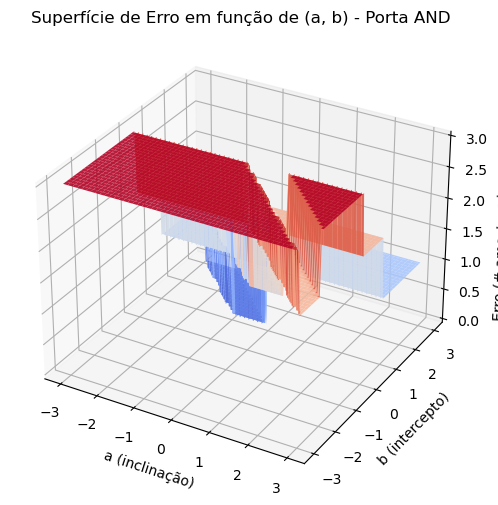

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ----------------------------------------------------------
# 1) DADOS: PORTA AND
# ----------------------------------------------------------
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
], dtype=float)

y = np.array([0, 0, 0, 1], dtype=float)

# ----------------------------------------------------------
# 2) FUN√á√ÉO DE PREDI√á√ÉO USANDO (a, b) EM x2 >= a*x1 + b
#    Se x2 >= a*x1 + b, prev√™ classe 1; caso contr√°rio, 0.
# ----------------------------------------------------------
def step_predict(a, b, x):
    """
    Retorna 1 se x2 >= a*x1 + b, sen√£o 0.
    """
    x1, x2 = x
    return 1 if (x2 >= a*x1 + b) else 0

# ----------------------------------------------------------
# 3) FUN√á√ÉO DE ERRO: CONTA QUANTAS AMOSTRAS S√ÉO CLASSIFICADAS
#    INCORRETAMENTE PELO PAR (a, b).
# ----------------------------------------------------------
def classification_error(a, b, X, y):
    errors = 0
    for i in range(len(X)):
        y_pred = step_predict(a, b, X[i])
        if y_pred != y[i]:
            errors += 1
    return errors

# ----------------------------------------------------------
# 4) CONSTRU√á√ÉO DA SUPERF√çCIE DE ERRO (a, b) -> erro
#    a e b v√£o variar em intervalos escolhidos (por exemplo, [-3, 3]).
# ----------------------------------------------------------
N = 100  # resolu√ß√£o da malha
a_vals = np.linspace(-3, 3, N)
b_vals = np.linspace(-3, 3, N)

# Matriz para armazenar o erro
error_surface = np.zeros((N, N))

# Para cada (a, b) no grid, calcule quantas amostras o classificador erra
for i, a_ in enumerate(a_vals):
    for j, b_ in enumerate(b_vals):
        error_surface[i, j] = classification_error(a_, b_, X, y)

# ----------------------------------------------------------
# 5) PLOT DA SUPERF√çCIE DE ERRO 3D
# ----------------------------------------------------------
A, B = np.meshgrid(a_vals, b_vals)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Transpomos error_surface pois meshgrid(A,B) tem forma (N,N) casando com [j,i]
ax.plot_surface(A, B, error_surface.T, cmap='coolwarm', alpha=0.9)

ax.set_xlabel('a (inclina√ß√£o)')
ax.set_ylabel('b (intercepto)')
ax.set_zlabel('Erro (# amostras incorretas)')
ax.set_title('Superf√≠cie de Erro em fun√ß√£o de (a, b) - Porta AND')

plt.show()


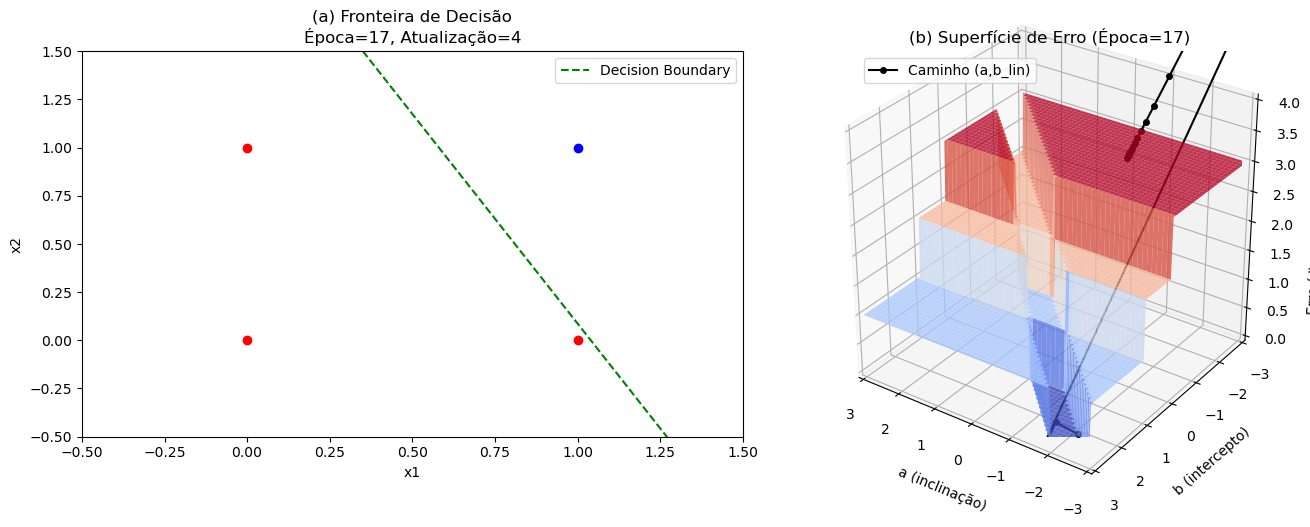

√âpoca 17, Erros: 1
√âpoca 18, Erros: 0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output
import time

# -------------------------------------------------------
# 1) DADOS DE TREINAMENTO: PORTA AND
# -------------------------------------------------------
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
], dtype=float)

y = np.array([0, 0, 0, 1], dtype=float)

# -------------------------------------------------------
# 2) HIPERPAR√ÇMETROS E INICIALIZA√á√ÉO DE PESOS
# -------------------------------------------------------
lr = 0.01         # Taxa de aprendizado
max_epochs = 30  # N√∫mero m√°ximo de √©pocas

# Pesos iniciais (w1, w2) e bias (b)
W = np.random.randn(2)  # (w1, w2)
b = np.random.randn()   # bias

# -------------------------------------------------------
# 3) FUN√á√ÉO STEP (DEGRAU)
# -------------------------------------------------------
def step_function(z):
    return 1 if z >= 0 else 0

# -------------------------------------------------------
# 4) CONVERS√ÉO DE (w1, w2, b) -> (a, b_lin) 
#    Reta: w1*x1 + w2*x2 + b = 0  =>  x2 = - (b + w1*x1)/w2
#    Logo: a = -w1/w2,  b_lin = -b/w2
# -------------------------------------------------------
def w2ab(w1, w2, b):
    """
    Converte pesos do Perceptron para (a, b_lin):
      x2 = a*x1 + b_lin
    Se w2 ~ 0, a e b_lin ficam indefinidos; 
    aqui assumimos que n√£o vai acontecer no treinamento 
    (caso contr√°rio, tratar a parte).
    """
    if abs(w2) < 1e-9:
        # Evita divis√£o por zero (ou quase zero).
        return None, None
    a_slope = -w1 / w2
    b_lin   = -b   / w2
    return a_slope, b_lin

# -------------------------------------------------------
# 5) C√ÅLCULO DE ERRO USANDO (a, b_lin)
#    Classifica: se x2 >= a*x1 + b_lin => 1, sen√£o 0
# -------------------------------------------------------
def classification_error_ab(a, b_lin, X, y):
    errors = 0
    for i in range(len(X)):
        x1, x2 = X[i]
        y_pred = 1 if (x2 >= a*x1 + b_lin) else 0
        if y_pred != y[i]:
            errors += 1
    return errors

# -------------------------------------------------------
# 6) CRIANDO A SUPERF√çCIE DE ERRO EM (a, b_lin)
#    Geramos a e b_lin em intervalos pr√©-definidos.
# -------------------------------------------------------
N = 200  # Resolu√ß√£o do grid
a_vals  = np.linspace(-3, 3, N)
b_vals  = np.linspace(-3, 3, N)

error_surface = np.zeros((N, N))

for i, a_ in enumerate(a_vals):
    for j, b_ in enumerate(b_vals):
        error_surface[i, j] = classification_error_ab(a_, b_, X, y)

# -------------------------------------------------------
# 7) LISTA PARA ARMAZENAR O CAMINHO (a, b_lin) AO LONGO
#    DO TREINAMENTO NO ESPA√áO DE PAR√ÇMETROS.
# -------------------------------------------------------
AB_path = []

# Guarda o (a,b_lin) inicial (caso w2 n√£o seja ~0)
a0, b0 = w2ab(W[0], W[1], b)
AB_path.append((a0, b0))

# -------------------------------------------------------
# 8) FUN√á√ÉO PARA PLOTAR DOIS SUBPLOTS:
#    (1) Fronteira de decis√£o em 2D  (a,b_lin)
#    (2) Superf√≠cie de erro 3D       (a,b_lin, erro)
# -------------------------------------------------------
def plot_all_ab(W, b, X, y, AB_path, epoch, update_i):
    """
    Subplot (1): Plot dos dados e a reta x2 = a*x1 + b_lin
    Subplot (2): Plot 3D da superf√≠cie no espa√ßo (a,b_lin)
                 + caminho percorrido (AB_path).
    """
    # Converte w1,w2,b => a, b_lin
    a_slope, b_lin = w2ab(W[0], W[1], b)
    
    fig = plt.figure(figsize=(14, 5))
    
    # ---------------------------------------------------
    # Subplot 1: Fronteira de decis√£o no plano (x1,x2)
    # ---------------------------------------------------
    ax1 = fig.add_subplot(1, 2, 1)
    
    # Plotando os pontos
    for (x_pt, label) in zip(X, y):
        if label == 0:
            ax1.plot(x_pt[0], x_pt[1], 'ro')
        else:
            ax1.plot(x_pt[0], x_pt[1], 'bo')
    
    # Se a_slope,b_lin forem v√°lidos => plota a reta
    if (a_slope is not None) and (b_lin is not None):
        x_vals = np.linspace(-0.5, 1.5, 50)
        y_vals = a_slope*x_vals + b_lin
        ax1.plot(x_vals, y_vals, 'g--', label="Decision Boundary")
        ax1.legend()
    
    ax1.set_xlim(-0.5, 1.5)
    ax1.set_ylim(-0.5, 1.5)
    ax1.set_xlabel("x1")
    ax1.set_ylabel("x2")
    ax1.set_title(f"(a) Fronteira de Decis√£o\n√âpoca={epoch}, Atualiza√ß√£o={update_i}")
    
    # ---------------------------------------------------
    # Subplot 2: Superf√≠cie de erro em (a,b_lin)
    # ---------------------------------------------------
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ax2.view_init(elev=30, azim=125)  # ROTACIONA A VISUALIZA√á√ÉO
    
    A_grid, B_grid = np.meshgrid(a_vals, b_vals)
    # Usar contour3D ou plot_surface
    ax2.plot_surface(A_grid, B_grid, error_surface.T, cmap='coolwarm', alpha=0.8)
    ax2.dist = 8  # Aproxima a c√¢mera (zoom in)
    ax2.set_proj_type('persp')  # ou 'persp'
    ax2.set_box_aspect((1,1,1))
    ax2.set_xlim3d(-3, 3)
    ax2.set_ylim3d(-3, 3)
    ax2.set_zlim3d(0, 4)
    
    
    # Plota o caminho percorrido
    if len(AB_path) > 0:
        A_list, B_list = zip(*AB_path)
        E_list = [classification_error_ab(a_, b_, X, y) for (a_, b_) in AB_path]
        ax2.plot(A_list, B_list, E_list, 'ko-', label="Caminho (a,b_lin)", markersize=4)
    
    ax2.set_xlabel("a (inclina√ß√£o)")
    ax2.set_ylabel("b (intercepto)")
    ax2.set_zlabel("Erro (# amostras incorretas)")
    ax2.set_title(f"(b) Superf√≠cie de Erro (√âpoca={epoch})")
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

# -------------------------------------------------------
# 9) LOOP DE TREINAMENTO DO PERCEPTRON
#    Mas a superf√≠cie ser√° plotada em (a,b_lin).
# -------------------------------------------------------
for epoch in range(1, max_epochs+1):
    error_count = 0
    
    for i in range(len(X)):
        # Forward
        z = np.dot(X[i], W) + b
        y_pred = step_function(z)
        
        # Erro
        e = y[i] - y_pred
        
        # Se houve erro => atualiza (w1,w2,b)
        if e != 0:
            W += lr * e * X[i]
            b += lr * e
            error_count += 1
            
            # Converte p/ (a,b_lin) e salva no caminho
            a_curr, b_curr = w2ab(W[0], W[1], b)
            AB_path.append((a_curr, b_curr))
            
            # Anima√ß√£o: limpa, plota
            clear_output(wait=True)
            plot_all_ab(W, b, X, y, AB_path, epoch, update_i=i+1)
            time.sleep(0.5)
    
    print(f"√âpoca {epoch}, Erros: {error_count}")
    if error_count == 0:
        break


In [8]:

# -------------------------------------------------------
# 6) TESTES FINAIS
# -------------------------------------------------------
print("\n--- Teste do Perceptron para AND ---")
for i, x_pt in enumerate(X):
    z = np.dot(x_pt, W) + b
    y_pred = step_function(z)
    print(f"Entrada {x_pt}, Sa√≠da Predita: {y_pred}, Real: {y[i]}")

print("\nPesos finais:", W)
print("Bias final:", b)



--- Teste do Perceptron para AND ---
Entrada [0. 0.], Sa√≠da Predita: 0, Real: 0.0
Entrada [0. 1.], Sa√≠da Predita: 0, Real: 0.0
Entrada [1. 0.], Sa√≠da Predita: 0, Real: 0.0
Entrada [1. 1.], Sa√≠da Predita: 1, Real: 1.0

Pesos finais: [0.17618361 0.12407397]
Bias final: -0.2522908269037608


### Alterando a Fun√ß√£o de Custo e Ativa√ß√£o do And

Substitui√ß√£o da Fun√ß√£o Step pela Sigm√≥ide e Entropia Cruzada**

Neste c√≥digo, estamos resolvendo o problema da porta l√≥gica **AND** usando um **Perceptron**.  
Originalmente, o Perceptron utiliza uma fun√ß√£o de ativa√ß√£o **degrau (step function)**, que retorna **1** se a entrada for maior ou igual a zero, e **0** caso contr√°rio.  

Essa fun√ß√£o √© simples, mas tem uma limita√ß√£o: **ela n√£o √© diferenci√°vel**, o que dificulta o uso de t√©cnicas de otimiza√ß√£o mais avan√ßadas.

Para melhorar o aprendizado do modelo, fizemos **duas mudan√ßas importantes**:

‚úÖ **Substitu√≠mos a fun√ß√£o degrau pela fun√ß√£o sigm√≥ide**  
‚úÖ **Introduzimos a entropia cruzada como fun√ß√£o de custo**  

---

 **1. Fun√ß√£o Sigm√≥ide**  

A fun√ß√£o **sigm√≥ide** √© uma fun√ß√£o de ativa√ß√£o **n√£o linear** que mapeia qualquer valor real para um valor entre **0 e 1**. Ela √© definida como:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Onde \( z \) √© a soma ponderada das entradas:

$$
z = w_1 x_1 + w_2 x_2 + b
$$

A sigm√≥ide possui as seguintes caracter√≠sticas:

- **Suave e diferenci√°vel** ‚Üí Permite otimiza√ß√£o via gradiente.
- **Interpreta√ß√£o probabil√≠stica** ‚Üí A sa√≠da pode ser interpretada como uma **probabilidade**:

$$
\sigma(z) \geq 0.5 \Rightarrow \text{sa√≠da = 1 (classe positiva)}
$$

$$
\sigma(z) < 0.5 \Rightarrow \text{sa√≠da = 0 (classe negativa)}
$$

 **2. Entropia Cruzada**  

A **entropia cruzada** √© uma fun√ß√£o de custo usada para medir a diferen√ßa entre a **previs√£o do modelo** e o **r√≥tulo verdadeiro**. Para um √∫nico exemplo, ela √© definida como:  

**Entropia Cruzada Bin√°ria (Binary Cross-Entropy ‚Äì BCE)**:    
  $$
    J(\theta) = -\frac{1}{n} \sum_{i=1}^{n} \left[y_i \log(\hat{y}_i) + (1 - y_i)\log(1 - \hat{y}_i)\right]
  $$
  - Adequada para problemas de classifica√ß√£o bin√°ria (ativa√ß√£o sigmoid na sa√≠da).

A entropia cruzada **penaliza previs√µes erradas**, especialmente quando o modelo est√° **muito confiante** em uma previs√£o incorreta. Isso faz com que o treinamento seja mais eficiente.  

- **Se a previs√£o for muito errada** (pr√≥xima de 0 quando deveria ser 1, ou vice-versa), a penaliza√ß√£o ser√° **alta**.  
- **Se a previs√£o for correta** (pr√≥xima de 1 quando deveria ser 1), a penaliza√ß√£o ser√° **baixa**.  


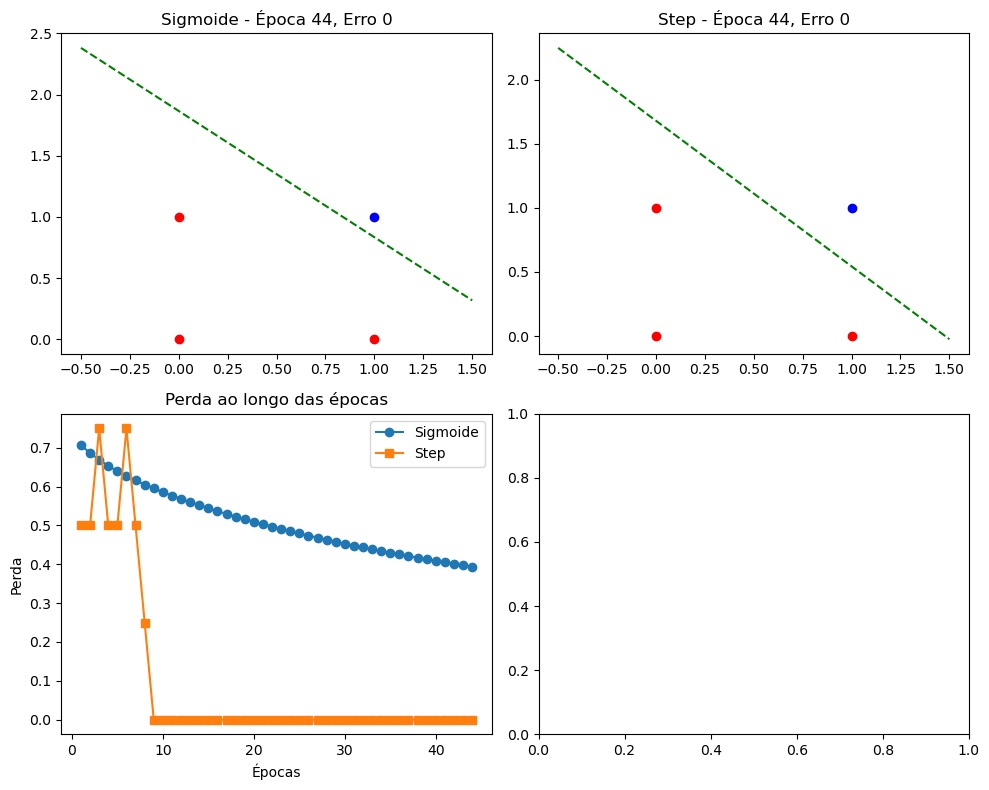

√âpoca 44, Erros Sigmoide: 0, Erros Step: 0
Converg√™ncia alcan√ßada!


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Dados de treinamento: porta AND
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=float)
y = np.array([0, 0, 0, 1], dtype=float)

# Hiperpar√¢metros
lr = 0.1        # Taxa de aprendizado
max_epochs = 50 # N√∫mero m√°ximo de √©pocas

# Inicializa√ß√£o de pesos e bias
W_sigmoid = np.random.randn(2) * 0.01
b_sigmoid = np.random.randn() * 0.01
W_step = W_sigmoid.copy()
b_step = b_sigmoid

# Fun√ß√µes de ativa√ß√£o
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def step_function(z):
    return 1 if z >= 0 else 0

# Fun√ß√£o de perda (entropia cruzada)
def cross_entropy_loss(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
    return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Armazena as perdas para o gr√°fico
loss_sigmoid = []
loss_step = []

def plot_results(W_sigmoid, b_sigmoid, W_step, b_step, epoch, errors_sigmoid, errors_step):
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))

    x_vals = np.linspace(-0.5, 1.5, 50)

    # Gr√°fico Sigmoide
    for i, (x_pt, label) in enumerate(zip(X, y)):
        axes[0, 0].plot(x_pt[0], x_pt[1], 'ro' if label == 0 else 'bo')
    if abs(W_sigmoid[1]) > 1e-9:
        y_vals = -(b_sigmoid + W_sigmoid[0] * x_vals) / W_sigmoid[1]
        axes[0, 0].plot(x_vals, y_vals, 'g--')
    axes[0, 0].set_title(f"Sigmoide - √âpoca {epoch}, Erro {errors_sigmoid}")

    # Gr√°fico Step
    for i, (x_pt, label) in enumerate(zip(X, y)):
        axes[0, 1].plot(x_pt[0], x_pt[1], 'ro' if label == 0 else 'bo')
    if abs(W_step[1]) > 1e-9:
        y_vals = -(b_step + W_step[0] * x_vals) / W_step[1]
        axes[0, 1].plot(x_vals, y_vals, 'g--')
    axes[0, 1].set_title(f"Step - √âpoca {epoch}, Erro {errors_step}")

    # Gr√°fico de perda
    axes[1, 0].plot(range(1, epoch + 1), loss_sigmoid, label="Sigmoide", marker='o')
    axes[1, 0].plot(range(1, epoch + 1), loss_step, label="Step", marker='s')
    axes[1, 0].set_title("Perda ao longo das √©pocas")
    axes[1, 0].set_xlabel("√âpocas")
    axes[1, 0].set_ylabel("Perda")
    axes[1, 0].legend()

    plt.tight_layout()
    plt.show()

# Treinamento
for epoch in range(1, max_epochs + 1):
    errors_sigmoid = 0
    errors_step = 0
    total_loss_sigmoid = 0
    total_loss_step = 0

    for i in range(len(X)):
        # Sigmoide
        z_sigmoid = np.dot(X[i], W_sigmoid) + b_sigmoid
        y_pred_sigmoid = sigmoid(z_sigmoid)
        loss_sigmoid_val = cross_entropy_loss(y[i], y_pred_sigmoid)
        total_loss_sigmoid += loss_sigmoid_val
        e_sigmoid = y_pred_sigmoid - y[i]
        W_sigmoid -= lr * e_sigmoid * X[i]
        b_sigmoid -= lr * e_sigmoid
        if abs(e_sigmoid) > 0.5:
            errors_sigmoid += 1

        # Step
        z_step = np.dot(X[i], W_step) + b_step
        y_pred_step = step_function(z_step)
        e_step = y[i] - y_pred_step
        if e_step != 0:
            W_step += lr * e_step * X[i]
            b_step += lr * e_step
            errors_step += 1
            loss_step_val = 1  # Consideramos perda 1 para erro e 0 para acerto
        else:
            loss_step_val = 0
        total_loss_step += loss_step_val

    loss_sigmoid.append(total_loss_sigmoid / len(X))
    loss_step.append(total_loss_step / len(X))

    # Limpar e atualizar o gr√°fico
    clear_output(wait=True)
    plot_results(W_sigmoid, b_sigmoid, W_step, b_step, epoch, errors_sigmoid, errors_step)

    print(f"√âpoca {epoch}, Erros Sigmoide: {errors_sigmoid}, Erros Step: {errors_step}")

    if errors_sigmoid == 0 and errors_step == 0:
        print("Converg√™ncia alcan√ßada!")
        break




√âpoca 1000 ‚Äî Perda total: 0.0425

ü•£ Superf√≠cie BCE com b = 0 (trajet√≥ria com b fixo)


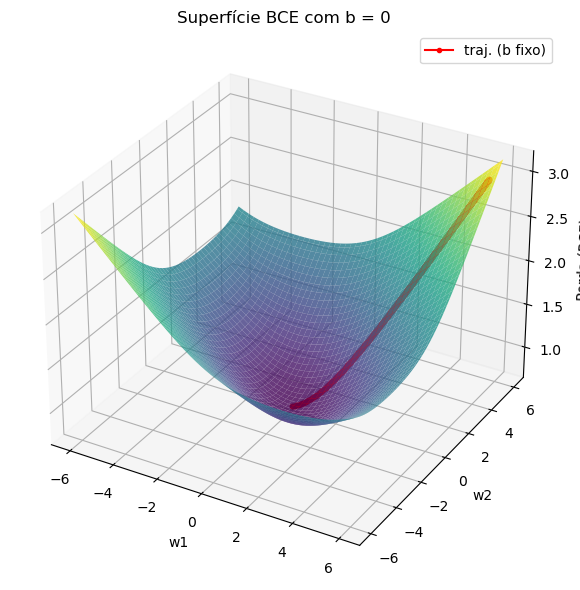

üìâ Curva da perda (BCE) ao longo das √©pocas


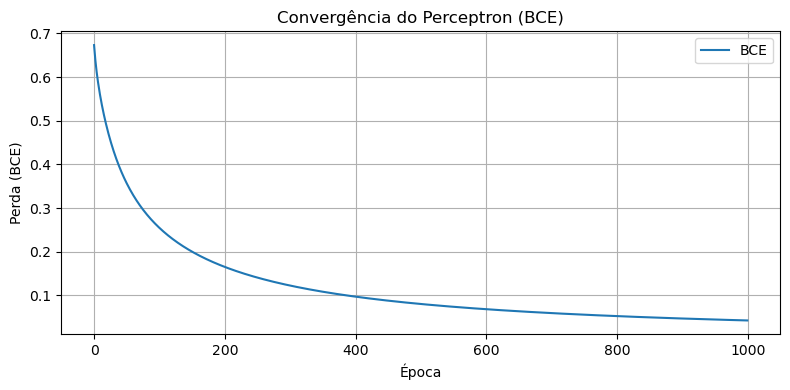

üìå Trajet√≥ria real no bowl BCE com b vari√°vel


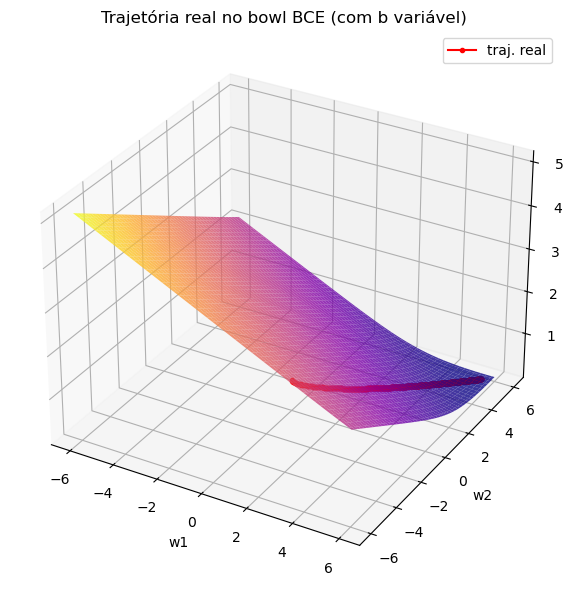

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output
import time

# -------------------------------------------------------
# 1) Dados ‚Äì Porta AND
# -------------------------------------------------------
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype=float)
y = np.array([0, 0, 0, 1], dtype=float)

# -------------------------------------------------------
# 2) Hiperpar√¢metros
# -------------------------------------------------------
lr = 0.1
max_epochs = 1000
rng = np.random.default_rng(42)

W = rng.normal(scale=1e-2, size=2)
b = rng.normal(scale=1e-2)

# -------------------------------------------------------
# 3) Fun√ß√µes
# -------------------------------------------------------
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def binary_cross_entropy(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
    return -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def loss_bce(w1, w2, b_val):
    return np.mean([
        binary_cross_entropy(yi, sigmoid(w1 * x1 + w2 * x2 + b_val))
        for (x1, x2), yi in zip(X, y)
    ])

# -------------------------------------------------------
# 4) Hist√≥rico de aprendizado
# -------------------------------------------------------
path_w, path_loss, path_b = [], [], []

# -------------------------------------------------------
# 5) Treinamento com BCE + Sigmoid
# -------------------------------------------------------
for epoch in range(1, max_epochs + 1):
    for xi, yi in zip(X, y):
        z     = np.dot(xi, W) + b
        y_hat = sigmoid(z)
        grad  = y_hat - yi
        W -= lr * grad * xi
        b -= lr * grad

    # Ao final da √©poca: avalia perda global
    epoch_loss = loss_bce(W[0], W[1], b)
    path_loss.append(epoch_loss)
    path_w.append(W.copy())
    path_b.append(b)

    clear_output(wait=True)
    print(f'√âpoca {epoch} ‚Äî Perda total: {epoch_loss:.4f}')
    if epoch_loss < 0.01:
        print('Converg√™ncia alcan√ßada!')
        break

# -------------------------------------------------------
# 6) VISUALIZA√á√ÉO 1 ‚Äî Cuia BCE com b fixo (trajet√≥ria did√°tica)
# -------------------------------------------------------
print("\nü•£ Superf√≠cie BCE com b = 0 (trajet√≥ria com b fixo)")

w1_range = np.linspace(-6, 6, 100)
w2_range = np.linspace(-6, 6, 100)
W1g, W2g = np.meshgrid(w1_range, w2_range)
surf_cuia = np.vectorize(lambda w1, w2: loss_bce(w1, w2, 0))(W1g, W2g)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W1g, W2g, surf_cuia.T, cmap='viridis', alpha=0.8)

# Trajet√≥ria com b fixo
w1_traj, w2_traj = zip(*path_w)
loss_fixed_b = [loss_bce(w1, w2, 0) for w1, w2 in path_w]
ax.plot(w1_traj, w2_traj, loss_fixed_b, 'ro-', ms=3, label='traj. (b fixo)')

ax.set_xlabel("w1")
ax.set_ylabel("w2")
ax.set_zlabel("Perda (BCE)")
ax.set_title("Superf√≠cie BCE com b = 0")
ax.legend()
plt.tight_layout()
plt.show()

# -------------------------------------------------------
# 7) VISUALIZA√á√ÉO 2 ‚Äî BCE ao longo das √©pocas
# -------------------------------------------------------
print("üìâ Curva da perda (BCE) ao longo das √©pocas")
plt.figure(figsize=(8, 4))
plt.plot(path_loss, label="BCE")
plt.xlabel("√âpoca")
plt.ylabel("Perda (BCE)")
plt.title("Converg√™ncia do Perceptron (BCE)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------------------------------------
# 8) VISUALIZA√á√ÉO 3 ‚Äî Trajet√≥ria real com b vari√°vel
# -------------------------------------------------------
print("üìå Trajet√≥ria real no bowl BCE com b vari√°vel")

b_last = path_b[-1]
surf_final = np.vectorize(lambda w1, w2: loss_bce(w1, w2, b_last))(W1g, W2g)
traj_bce_real = [loss_bce(w1, w2, b) for (w1, w2), b in zip(path_w, path_b)]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W1g, W2g, surf_final.T, cmap='plasma', alpha=0.8)
ax.plot(w1_traj, w2_traj, traj_bce_real, 'ro-', ms=3, label='traj. real')

ax.set_xlabel("w1")
ax.set_ylabel("w2")
ax.set_zlabel("Perda (BCE)")
ax.set_title("Trajet√≥ria real no bowl BCE (com b vari√°vel)")
ax.legend()
plt.tight_layout()
plt.show()
